## Analysis of Data Professionals in 2017/2018

**Through the analysis, I'd like to know**

* __The preference of database systems__
* __Distribution of jobs in the data related field__
* __Job Locations - Countries__
* __The most popular data job's median/average salaries by experience__
* __Corrleation between salaries and education__

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import re
from collections import OrderedDict

In [2]:
prof_table = pd.read_csv(r'datasets\2018_Data_Professionals_Salary.csv', encoding='latin1')
print(prof_table.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6011 entries, 0 to 6010
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   SalaryUSD               6011 non-null   object
 1   Country                 6011 non-null   object
 2   PrimaryDatabase         6011 non-null   object
 3   YearsWithThisDatabase   6011 non-null   int64 
 4   OtherDatabases          4779 non-null   object
 5   JobTitle                6011 non-null   object
 6   YearsWithThisTypeOfJob  6011 non-null   int64 
 7   Education               6011 non-null   object
 8   HoursWorkedPerWeek      6011 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 422.8+ KB
None


### Data Cleaning

In [3]:
prof_table.head()

,SalaryUSD,Country,PrimaryDatabase,YearsWithThisDatabase,OtherDatabases,JobTitle,YearsWithThisTypeOfJob,Education,HoursWorkedPerWeek
0,200000,United States,Microsoft SQL Server,10,MySQL/MariaDB,DBA,5,Masters,45
1,61515,United Kingdom,Microsoft SQL Server,15,"Oracle, PostgreSQL",DBA,3,None (no degree completed),35
2,95000,Germany,Microsoft SQL Server,5,"Oracle, MySQL/MariaDB, Informix",Other,25,Masters,45
3,56000,United Kingdom,Microsoft SQL Server,6,NaN,DBA,2,Associates (2 years),40
4,35000,France,Microsoft SQL Server,10,Oracle,DBA,10,Bachelors (4 years),40


In [4]:
def object_to_int(object_list):
    '''
    return a list of int by transforming an object list that should've been of data type: int
    
        Args:
            object_list (series): a list of int-like objects
        return:
            Series of integers
    '''
    object_list = object_list.str.replace(',', '').str.replace('$', '').str.replace(' ', '')
    return object_list.astype(float).astype(int)

# drop the unwanted column
prof_table.drop(columns='OtherDatabases', inplace=True)
# rename columns for convenience
prof_table.rename(columns={'SalaryUSD':'SALARY_USD', 'Country':'COUNTRY', 'PrimaryDatabase':'DMBS', 
                           'YearsWithThisDatabase':'DBMS_YEARS', 'JobTitle':'JOB_TITLE',
                           'YearsWithThisTypeOfJob':'EXPERIENCE', 'Education':'EDUCATION',
                           'HoursWorkedPerWeek':'WEEKLY_HOUR'}, inplace=True)
# transform the data type of the series to int
prof_table['SALARY_USD'] = object_to_int(prof_table['SALARY_USD'])
prof_table.drop_duplicates(inplace=True)

# seeing if there is any invalid values
prof_table.isnull().sum()

SALARY_USD     0
COUNTRY        0
DMBS           0
DBMS_YEARS     0
JOB_TITLE      0
EXPERIENCE     0
EDUCATION      0
WEEKLY_HOUR    0
dtype: int64

### Preferred Primary Database Management Systems (DBMS)

In [5]:
primary_list = prof_table['DMBS'].value_counts().index
primary_count = (prof_table['DMBS'].value_counts().values)
print(prof_table['DMBS'].value_counts())

Microsoft SQL Server       5617
Oracle                      194
PostgreSQL                   34
Other                        30
MySQL/MariaDB                23
Azure SQL DB                 19
DB2                          15
Microsoft Access             12
Teradata                     10
SAP                           9
Amazon RDS (any flavor)       8
MongoDB                       6
SQLite                        3
Elasticsearch                 2
Cassandra                     2
Name: DMBS, dtype: int64


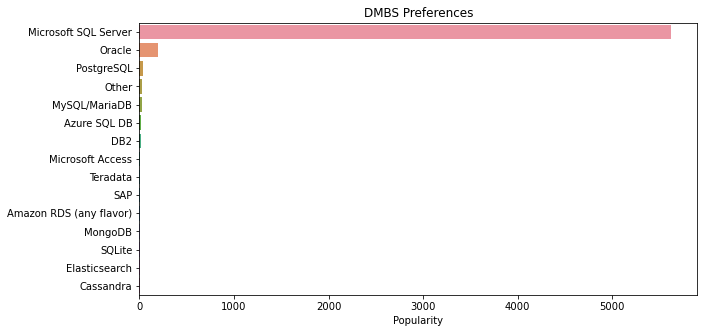

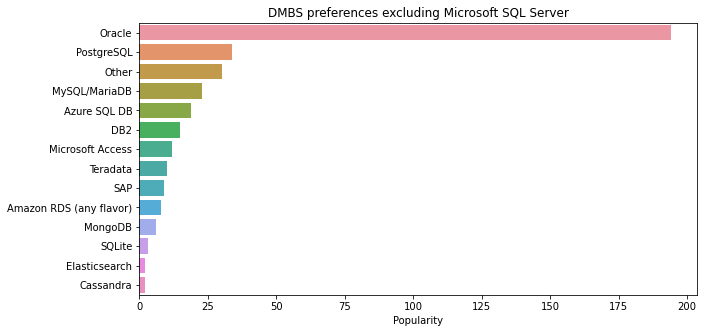

In [6]:
# creating a graph of primary databases
plt.figure(figsize=(10,5))
sns.barplot(x = primary_count, y = primary_list)
plt.xlabel('Popularity')
plt.title('DMBS Preferences')
plt.tight_layout
plt.show()

# creating another graph without MS SQL Server stats
plt.figure(figsize=(10,5))
sns.barplot(x = primary_count[1:], y = primary_list[1:])
plt.xlabel('Popularity')
plt.title('DMBS preferences excluding Microsoft SQL Server')
plt.tight_layout
plt.show()

#### Observations
Microsoft SQL Server is by far the most used DBMS for companies across the world

Oracle seems to be popular among all other options

### Most popular data jobs 

#### Grouping similar jobs together

In [7]:
print('Data jobs before')
print(prof_table['JOB_TITLE'].unique())

Data jobs before
['DBA' 'Other' 'Developer: App code (C#, JS, etc)' 'Engineer'
 'Developer: T-SQL'
 'Developer: Business Intelligence (SSRS, PowerBI, etc)' 'Architect'
 'Analyst' 'Manager' 'Data Scientist' 'Principal database engineer'
 'DevOps, Sr Software Engineer DBA' 'Technician ' 'Database Specialist'
 'Consultant' 'Systems Administrator' 'Sales' 'DBA / BI Developer'
 'Sr Consultant ' 'Analytics consultant'
 'DBA (General - splits time evenly between writing & tuning queries AND building & troubleshooting servers)'
 'DBA (Development Focus - tunes queries, indexes, does deployments)'
 'DBA (Production Focus - build & troubleshoot servers, HA/DR)']


In [8]:
job_list = prof_table['JOB_TITLE'].unique()

# update the job list directly
for job in job_list:
    job_indexes = prof_table[prof_table['JOB_TITLE'] == job].index
    if 'dba' in job.lower():
        prof_table.at[job_indexes, 'JOB_TITLE'] = 'DBA'
    elif 'developer' in job.lower():
        prof_table.at[job_indexes, 'JOB_TITLE'] = 'Developer'
    elif 'consultant' in job.lower():
        prof_table.at[job_indexes, 'JOB_TITLE'] = 'Consultant'
    elif 'engineer' in job.lower():
        prof_table.at[job_indexes, 'JOB_TITLE'] = 'Engineer'        
    else:
        pass

print('Data jobs after')
print(prof_table['JOB_TITLE'].unique())

Data jobs after
['DBA' 'Other' 'Developer' 'Engineer' 'Architect' 'Analyst' 'Manager'
 'Data Scientist' 'Technician ' 'Database Specialist' 'Consultant'
 'Systems Administrator' 'Sales']


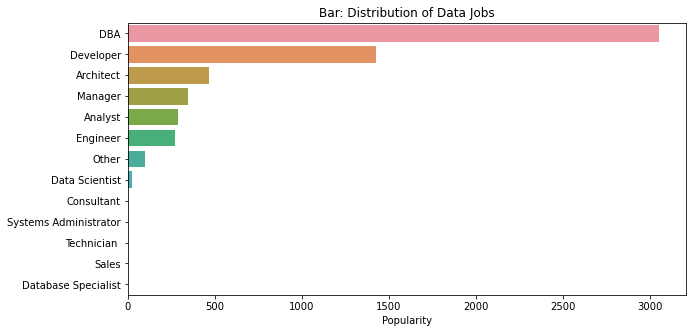

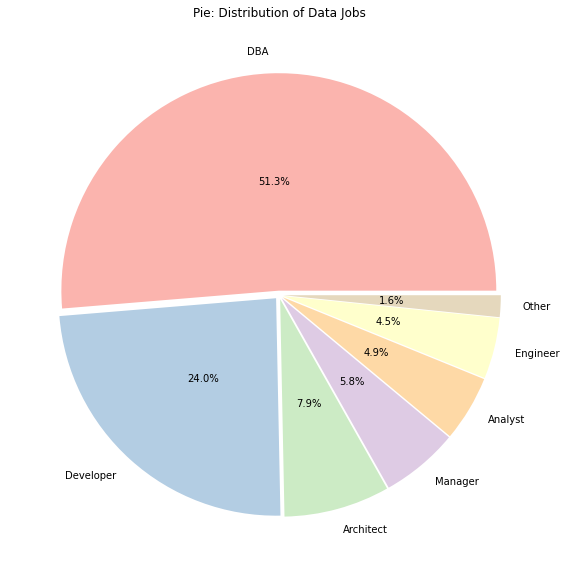

In [9]:
job_list, job_count = prof_table['JOB_TITLE'].value_counts().index, prof_table['JOB_TITLE'].value_counts().values
job_count_sum = prof_table['JOB_TITLE'].value_counts().values.sum()
job_pct = (job_count/job_count_sum)*100

plt.figure(figsize=(10, 5))
sns.barplot(x = job_count, y = job_list)
plt.xlabel('Popularity')
plt.title('Bar: Distribution of Data Jobs')
plt.show()

# this is to remove clusters
pie_job_list = job_list[np.where(job_pct > 1)]
pie_count_list = job_count[np.where(job_pct > 1)]
colors = [plt.cm.Pastel1(i) for i in range(len(pie_count_list))]

plt.figure(figsize=(10, 10))
plt.pie(x=pie_count_list, autopct="%.1f%%", explode=[0.02]*len(pie_count_list), labels=pie_job_list, pctdistance=0.5, colors=colors)
plt.title('Pie: Distribution of Data Jobs')
plt.show()

continue from here

### Where are these jobs offered?

           COUNTRY  JOB_TITLE
80   United States       3883
79  United Kingdom        595
11          Canada        215
2        Australia        160
33           India        109
71          Sweden         80
25         Germany         80
51     Netherlands         71
69    South Africa         53
52     New Zealand         47


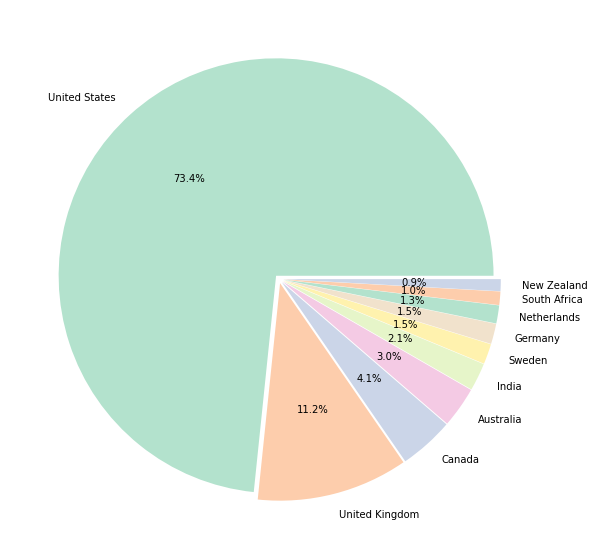

In [10]:
# Let's find job locations
temp = prof_table[['COUNTRY', 'JOB_TITLE']]
job_locations = temp.groupby('COUNTRY', as_index=False).count()
job_locations = job_locations.sort_values(by='JOB_TITLE', ascending=False).head(10)
print(job_locations)

colors2 = [plt.cm.Pastel2(i) for i in range(len(pie_count_list))]
job_countries = job_locations['COUNTRY']
job_count = job_locations['JOB_TITLE']

plt.figure(figsize=(10,10))
plt.pie(job_count,  explode=[0.02]*len(job_count),labels=job_countries, autopct='%1.1f%%', colors=colors2)
plt.show()

Given the scarcity of data, it's difficult to make a definite conclusion; however, it still gives a good sense of the bigger picture. 

America is by far the most dominant in providing data job opportunities from this data. Let's make some comparisons to find reasons behind this obervation

In [11]:
prof_table[prof_table['JOB_TITLE'].isin(job_list)]

,SALARY_USD,COUNTRY,DMBS,DBMS_YEARS,JOB_TITLE,EXPERIENCE,EDUCATION,WEEKLY_HOUR
0,200000,United States,Microsoft SQL Server,10,DBA,5,Masters,45
1,61515,United Kingdom,Microsoft SQL Server,15,DBA,3,None (no degree completed),35
2,95000,Germany,Microsoft SQL Server,5,Other,25,Masters,45
3,56000,United Kingdom,Microsoft SQL Server,6,DBA,2,Associates (2 years),40
4,35000,France,Microsoft SQL Server,10,DBA,10,Bachelors (4 years),40
...,...,...,...,...,...,...,...,...
6006,85000,United States,Microsoft SQL Server,7,Developer,2,Bachelors (4 years),43
6007,160000,United States,MySQL/MariaDB,8,Developer,8,Bachelors (4 years),45
6008,50000,France,Microsoft SQL Server,8,DBA,2,Associates (2 years),39
6009,119000,United States,Microsoft SQL Server,18,Developer,7,Bachelors (4 years),50


In [12]:
def avg_salary(df, country, job_title):
    '''
    return average salary of a given job
    
        Args:
            df: DataFrame
            country (str or list or Series): name of a country
            job_title (str or list or Series): professional title of the job
        
        Return:
            avg (float): average value of given salaries in a country
    '''
    if isinstance(country, str):
        country = [country]
    elif isinstance(job_title, str):
        job_title = [job_title]
    return round(df.loc[df['COUNTRY'].isin(country) & df['JOB_TITLE'].isin(job_list)]['SALARY_USD'].mean(), 2)


def median_salary(df, country, job_title):
    '''
    return median salary of a given job
    
        Args:
            df: DataFrame
            country (str or list or Series): name of a country
            job_title (str or list or Series): professional title of the job
        
        Return:
            avg (float): median value of given salaries in a country
    '''
    if isinstance(country, str):
        country = [country]
    elif isinstance(job_title, str):
        job_title = [job_title]
    return round(df.loc[df['COUNTRY'].isin(country) & df['JOB_TITLE'].isin(job_list)]['SALARY_USD'].median(), 2)


us_avg_salary = avg_salary(prof_table, 'United States', pd.Series(job_list))
not_us_country = prof_table[prof_table['COUNTRY'] != 'United States']['COUNTRY'].unique()
not_us_avg_salary = avg_salary(prof_table, not_us_country, job_list)

print('Average Salary')
print('In the US:', us_avg_salary)
print('Outside of the US:', not_us_avg_salary)
print()

us_median_salary = median_salary(prof_table, 'United States', pd.Series(job_list))
not_us_median_salary = median_salary(prof_table, not_us_country, job_list)

print('Median Salary')
print('In the US:', us_median_salary)
print('Outside of the US:', not_us_median_salary)

Average Salary
In the US: 107630.4
Outside of the US: 64315.35

Median Salary
In the US: 102000.0
Outside of the US: 60000.0


Both average and mean salaries in the U.S are significantly higher than those of outside of the U.S, which could explain the concentration of 73.4% we've seen above. 

##### Analysis 4: DBAs' salaries by experience in the U.S.
dark blue indicates the movement of the trend line, while the light blue indicate variance.
There is an apparent positive correlation between salary and experience, 
which makes sense: people with more experience get paid more

### Mean and Median Salaries by Experience in the U.S

In [13]:
# let's see if there are outliers like negative values (x < 0) or extremely high (x > 100)
prof_table['EXPERIENCE'].value_counts()

1     739
2     736
3     679
5     622
4     517
10    447
6     336
7     275
8     246
15    216
20    166
12    156
9     119
11     91
17     84
18     83
16     71
0      66
25     59
13     56
14     42
19     30
22     24
21     22
30     21
23     13
28      9
29      8
26      8
27      7
24      7
33      6
35      5
32      4
31      3
37      2
36      2
40      2
34      2
38      2
39      1
Name: EXPERIENCE, dtype: int64

Everything seems good to start an analysis

**NOTE**: It would be good to calculate mean and median salaries by experience AND job titles, but since our data is too small, I am only going to use experience for this analysis.

In [14]:
def level_of_exp(exp_list):
    '''
    distribute experience into four levels of experience
        entry level: 0 ~ 3
        intermediate level:4 ~ 7
        advanced level: 8 ~ 10
        expert level: 11 < x
    
        Args:
            exp_list (list of int): a list of experiences
        
        Return:
            level_list (array): a list of experience levels (one of )
    '''
    level_list = []
    for exp in exp_list:
        if exp >= 0 and exp <= 3:
            level_list.append('Beginner')
        elif exp > 3 and exp <= 7:
            level_list.append('Intermediate')
        elif exp > 7 and exp <= 10:
            level_list.append('Advanced')        
        else:
            level_list.append('Expert')
    return pd.Series(level_list)

def salary_stat_level(df, mean=True, median=True):
    '''
    Return mean and/or median salaries of a given list with in a given country or countries
    
        Args:
            exp_list (array of int): a list of experiences
            df (DataFrame): a dataframe containing columns of experience and country
            mean (bool): if true return average salary
            median (bool): if true return median salary
    
        Return:
            mean_dict or median_dict (OrderedDict): a dictionary of all levels' mean/median salaries
                                                    OR
            mean_median_indicator (dict of OrderedDict): if both mean and median are wanted, return a dict of both dicts
    '''
    level_list = level_of_exp(df['EXPERIENCE'])
    temp_df = df.copy()
    temp_df['LEVEL OF EXP'] = level_list
    unique_levels = ['Beginner', 'Intermediate', 'Advanced', 'Expert']
    mean_median_indicator = dict()
    mean_dict = OrderedDict()
    median_dict = OrderedDict()
    
    for level in unique_levels:
        if median and mean:
            mean_dict[level] = round(temp_df.loc[temp_df['LEVEL OF EXP'] == level]['SALARY_USD'].mean(), 2)
            median_dict[level] = round(temp_df.loc[temp_df['LEVEL OF EXP'] == level]['SALARY_USD'].median(), 2)
        elif mean:
            mean_dict[level] = round(temp_df.loc[temp_df['LEVEL OF EXP'] == level]['SALARY_USD'].mean(), 2)
        elif median:
            median_dict[level] = round(temp_df.loc[temp_df['LEVEL OF EXP'] == level]['SALARY_USD'].median(), 2)
    
    if median and mean:
        mean_median_indicator['Mean'] = mean_dict
        mean_median_indicator['Median'] = median_dict
        return mean_median_indicator
    elif mean:
        return mean_dict
    elif median:
        return median_dict

print('US test')
print()
US_df = prof_table[prof_table['COUNTRY'] == 'United States']

print('Both mean and median')
print(salary_stat_level(US_df))
print()
print('Only median:', salary_stat_level(US_df, mean = False))
print('Only mean:', salary_stat_level(US_df, median = False))

US test

Both mean and median
{'Mean': OrderedDict([('Beginner', 110383.42), ('Intermediate', 105850.99), ('Advanced', 104509.0), ('Expert', 105708.71)]), 'Median': OrderedDict([('Beginner', 102000.0), ('Intermediate', 103000.0), ('Advanced', 102247.0), ('Expert', 103000.0)])}

Only median: OrderedDict([('Beginner', 102000.0), ('Intermediate', 103000.0), ('Advanced', 102247.0), ('Expert', 103000.0)])
Only mean: OrderedDict([('Beginner', 110383.42), ('Intermediate', 105850.99), ('Advanced', 104509.0), ('Expert', 105708.71)])


In [ ]:
# create a dataframe to display DBA's average/median salaries of all groups
mean_list = [entry_level_mean, int_level_mean, advanced_level_mean, expert_level_mean]
median_list = [entry_level_median, int_level_median, advanced_level_median, expert_level_median]
experience_list = ['entry level (< 4)', 'intermediate level (4~8)',\
                  'advanced level (9~15)', 'expert level (< 15)']
frame = {'Average Salary':mean_list, 'Median Salary':median_list}
salary_df = pd.DataFrame(frame, index=experience_list)
print(salary_df)

# create a graph of average salary by experience groups
plt.ylim(40000, 140000)
plt.title("DBA's Average Salary by Experience")
plt.ylabel("Average Salary (USD)")
plt.bar(experience_list, mean_list, 0.5)
plt.show()
# create a graph of median salary by experience groups
plt.ylim(40000, 140000)
plt.title("DBA's Median Salary by Experience")
plt.ylabel("Median Salary (USD)")
plt.bar(experience_list, median_list, 0.5)
plt.show()

##### Analysis 5: average/median salaries of DBAs in the U.S.
As seen on the scatter graph, these two graphs confirm the trend: more experience results in higher payrolls. 
Both medians and averages were used to display the trend since averages could be skewed by extreme stats.

In [ ]:
# graph lines to compare average salary vs median salary
plt.ylim(40000, 140000)
plt.title("DBA's Average vs Median")
plt.ylabel('USD ($)')
plt.plot(experience_list, median_list, c='tab:blue', marker='o', label='median')
plt.plot(experience_list, mean_list, c='tab:red', marker='*', label='average')
plt.legend()
plt.show()

# create bar graphs side by side to compare average salary vs median salary
plt.ylim(40000, 140000)
x_indexes = np.arange(len(experience_list))
width = 0.3
plt.title("DBA's Average vs Median")
plt.ylabel('USD ($)')
plt.bar(x_indexes+width, mean_list, width=width, color='tab:red', label='average')
plt.bar(x_indexes, median_list, width=width, color='tab:blue', label='median')
plt.xticks(ticks=x_indexes, labels=experience_list)
plt.legend()
plt.show()

##### Analysis 6: Average/Median Salaries of DBAs in the U.S
In all sections, average salaries are slightly higher than median salaries.

What's noticeable from the table/graphs is average salaries are within the margin of error of ±6.5% of median salaries. 

Therefore, they are both pointing toward congruous estimations, meaning the results are reasonably reliable.

Thus we can give rough approximations of DBA's earning in the U.S.

* Entry level (0~3 years):90000 USD
* Intermediate level (4~8 years): 100000 USD
* Advanced level (9~15 years): 108000 USD
* Rxpert level (<15 years): 116000 USD

However, we need to take into account that these salaries are highly dependable on each individual's capability and educational background.

In [ ]:
# let's compare DBA's average and median salaries outside of the U.S.
prof_table_copy = prof_table.copy()
for ind in US_table.index:
    prof_table_copy.drop(ind, inplace=True)

# create a DBA table excluding the ones in the U.S.
exclude_US = prof_table_copy[['SalaryUSD', 'Country', 'JobTitle', 'YearsWithThisTypeOfJob']]
DBA_exclude_US = exclude_US.loc[exclude_US['JobTitle'] == 'DBA']
print(DBA_exclude_US)

In [ ]:
# find DBA's average/median salaries of different experience-groups
entry_level = DBA_exclude_US[DBA_exclude_US['YearsWithThisTypeOfJob'] < 4]
entry_level_median = int(entry_level['SalaryUSD'].median())
entry_level_mean = int(entry_level['SalaryUSD'].mean().round())
print(f'entry level median salary: {entry_level_median}')
print(f'entry level average salary: {entry_level_mean}')

int_level = DBA_exclude_US[(3 < DBA_exclude_US['YearsWithThisTypeOfJob']) & \
                   (DBA_exclude_US['YearsWithThisTypeOfJob'] < 9)]
int_level_median = int(int_level['SalaryUSD'].median())
int_level_mean = int(int_level['SalaryUSD'].mean().round())
print(f'intermediate level median salary: {int_level_median}')
print(f'intermediate level average salary: {int_level_mean}')

advanced_level = DBA_exclude_US[(8 < DBA_exclude_US['YearsWithThisTypeOfJob']) & \
                   (DBA_exclude_US['YearsWithThisTypeOfJob'] < 16)]
advanced_level_median = int(advanced_level['SalaryUSD'].median())
advanced_level_mean = int(advanced_level['SalaryUSD'].mean().round())
print(f'advanced level median salary: {advanced_level_median}')
print(f'advanced level average salary: {advanced_level_mean}')

expert_level = DBA_exclude_US[15 < DBA_exclude_US['YearsWithThisTypeOfJob']]
expert_level_median = int(expert_level['SalaryUSD'].median())
expert_level_mean = int(expert_level['SalaryUSD'].mean().round())
print(f'expert level median salary: {expert_level_median}')
print(f'expert level average salary: {expert_level_mean}')

In [ ]:
# create lists for x-axis & y-axis
exclude_US_DBA_salary = DBA_exclude_US['SalaryUSD']
experience = DBA_exclude_US['YearsWithThisTypeOfJob']

# create a scatter graph to see if there's a trend
plt.scatter(experience, exclude_US_DBA_salary, linewidths=0.5, s=20, edgecolors='black', alpha=0.45)
plt.ylim(0, 200000) #sets y range
plt.xlim(0, 35) # sets x range
plt.xlabel('Experience (yr)')
plt.ylabel('Salary (USD)')
plt.title('Salaries by Experience Outside of the U.S.')
plt.show()
plt.rcParams['figure.figsize'] = [10, 10]

##### Analsyis 7: average/median salaries of DBAs outside of the U.S.
It's extremely difficult to identify a trend

In [ ]:
# create a dataframe to display DBA's average/median salaries of all groups (outside of the U.S)
mean_list = [entry_level_mean, int_level_mean, advanced_level_mean, expert_level_mean]
median_list = [entry_level_median, int_level_median, advanced_level_median, expert_level_median]
experience_list = ['entry level (< 4)', 'intermediate level (4~8)',\
                  'advanced level (9~15)', 'expert level (< 15)']
frame = {'Average Salary':mean_list, 'Median Salary':median_list}
salary_df = pd.DataFrame(frame, index=experience_list)
print(salary_df)

# graph lines to compare the average/median salaries of DBA outside of the U.S.
plt.ylim(40000, 140000)
plt.title("DBA's Average vs Median Outside of the U.S.")
plt.ylabel('USD ($)')
plt.plot(experience_list, median_list, c='tab:blue', marker='o', label='median')
plt.plot(experience_list, mean_list, c='tab:red', marker='*', label='average')
plt.legend()
plt.show()

# create bar graphs to compare the average/median salaries of DBA outside of the U.S.
plt.ylim(40000, 100000)
x_indexes = np.arange(len(experience_list))
width = 0.3
plt.title("DBA's Average vs Median Outside of the U.S.")
plt.ylabel('USD ($)')
plt.bar(x_indexes+width, mean_list, width=width, color='tab:red', label='average')
plt.bar(x_indexes, median_list, width=width, color='tab:blue', label='median')
plt.xticks(ticks=x_indexes, labels=experience_list)
plt.legend()
plt.show()

##### Analysis 8: average/median salaries of DBA outside of the U.S.
Both average and median salaries are much lower than those of the U.S.

The growth rate of salaries over experience is much slower until the intermediate level and have a sharp increase til it reaches the expert level. However, the expert level average salary is almost equivalent of that of entry-level in the U.S. 

Also, we have to note the survey was participated by 1533 DBAs in the U.S. compared to 538 DBAs outside of the U.S.

It's unclear whether there were much more DBAs in the U.S or the survey was easier to access in the U.S. If it's the first case, then it should be closely correlated to the higher salaries of the DBAs in the U.S.

In [ ]:
# I want to know whether education level affects the median salary of data professionals

def cleanse_num(table, col):
    '''Returns a float from a number string with potentially commas, dollar signs, spaces, etcs in it.\
    Returns None if `val` cannot be converted into a number'''
    for item in table[col]:
        if type(item) == str:
            ind_item = table.loc[table[col] == item].index
            item = item.replace(' ', '')
            item = item.replace('$','')
            item = item.replace(',','')
            item = float(item)
            table.at[ind_item, col] = item
    return table

def cleanse_edu(table, col):
    '''Make terms in the education column simpler.
       This function is specifically for the education table'''
    edu_counter = Counter(table[str(col)])
    edu_list = list(edu_counter.keys())
    for item in edu_list:
        temp = table.loc[table[col] == item]
        for i in temp.index:
            if item == 'Bachelors (4 years)':
                prof_table.at[i, str(col)] = 'Bachelors'
            elif item == 'None (no degree completed)':
                prof_table.at[i, str(col)] = 'None'
            elif item == 'Associates (2 years)':
                prof_table.at[i, str(col)] = 'Associates'
            elif item == 'Doctorate/PhD':
                prof_table.at[i, str(col)] = 'PhD'
            else:
                continue
    return table

In [ ]:
# disable the unnecessary warning
pd.options.mode.chained_assignment = None  # default='warn'

# see how much education was completed for most data professionals.
education = prof_table[['SalaryUSD', 'JobTitle', 'Education', 'YearsWithThisTypeOfJob']]
education_counter = Counter(education['Education']).most_common(10)
education_list = []
education_occurrences = []
for item in education_counter:
    education_list.append(item[0])
    education_occurrences.append(item[1])

# cleanse data of the education column and the salary column
cleanse_edu(education, 'Education')
cleanse_num(education, 'SalaryUSD')

# create a table to display occurrences of each education level
education_table = pd.DataFrame({'Occurance':education_occurrences}, index=education_list)
print(education_table)

def edu_median_salary(edu_level, experience):
    """To see the difference in median salaries in more detail, give a median salary of an experience group.
       It should be easier to see whether there's a correlation or not between education and salary"""
    if experience == 'entry':
        temp_table = education.loc[(education['Education'] == edu_level) & \
                    (education['YearsWithThisTypeOfJob'] < 4)]
        return temp_table['SalaryUSD'].median()
    elif experience == 'intermediate':
        temp_table = education.loc[(education['Education'] == edu_level) & \
                    (education['YearsWithThisTypeOfJob'] >= 4) & \
                    (education['YearsWithThisTypeOfJob'] < 9)]
        return temp_table['SalaryUSD'].median()
    elif experience == 'advanced':
        temp_table = education.loc[(education['Education'] == edu_level) & \
                    (education['YearsWithThisTypeOfJob'] >= 9) & \
                    (education['YearsWithThisTypeOfJob'] < 16)]       
        return temp_table['SalaryUSD'].median()
    else:
        temp_table = education.loc[(education['Education'] == edu_level) & \
                    (education['YearsWithThisTypeOfJob'] >= 16)]       
        return temp_table['SalaryUSD'].median()    

In [ ]:
# create four lists to display median salaries of all ranges of experience side by side
entry_median_salary = []
intermediate_median_salary = []
advanced_median_salary = []
expert_median_salary = []

for item in education_list:
    entry_median_salary.append(edu_median_salary(item, 'entry'))
for item in education_list:
    intermediate_median_salary.append(edu_median_salary(item, 'intermediate'))
for item in education_list:
    advanced_median_salary.append(edu_median_salary(item, 'advanced'))
for item in education_list:
    expert_median_salary.append(edu_median_salary(item, 'expert'))

# create a table of median salaries
all_median = pd.DataFrame({'entry level median salary':entry_median_salary,\
                           'intermediate level median salary': intermediate_median_salary,\
                           'advanced level median salary': advanced_median_salary,\
                           'expert level median salary': expert_median_salary}, index=education_list)
print(all_median)

##### Analysis 10: is there no correlation between salaries and education?
There are two possible explanations behind this outcome.

It could be because there is no salary difference between data professionals on their educational background, which
ultimately tells us there's no coorelation between salaries and education.

However, people with no diploma getting paid equally or even better than people with PhDs at entry and intermediate levels 
makes not much sense to me.

Thus, I believe it's due to the difference of quantity of collected data for each education-level groups.
For example, there were 3198 Bachelors compared to 45 PhDs who have finished the survey.

The lack of sample sizes for some groups has mostly likely caused the skewed outcome. To my belief,
if there were more samples for all groups, this data would've yielded a significantly stable outcome.